In [1]:
library(TSA)
library(tseries)
library(forecast)
library(car)
library(fGarch)
library(FinTS)
library(RColorBrewer)
library(urca)


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Loading required package: carData
Loading required package: timeDate

Attaching package: 'timeDate'

The following objects are masked from 'package:TSA':

    kurtosis, skewness

Loading required package: timeSeries
Loading required package: fBasics

Attaching package: 'fBasics'

The following object is masked from 'package:car':

    densityPlot

Loading required package: zoo

Attaching package: 'zoo'

The following object is masked from 'package:timeSeries':

    time<-

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'FinTS'

The following object is masked from 'package:forecast':

    Acf



In [2]:
data('UKDriverDeaths')
data('Seatbelts')

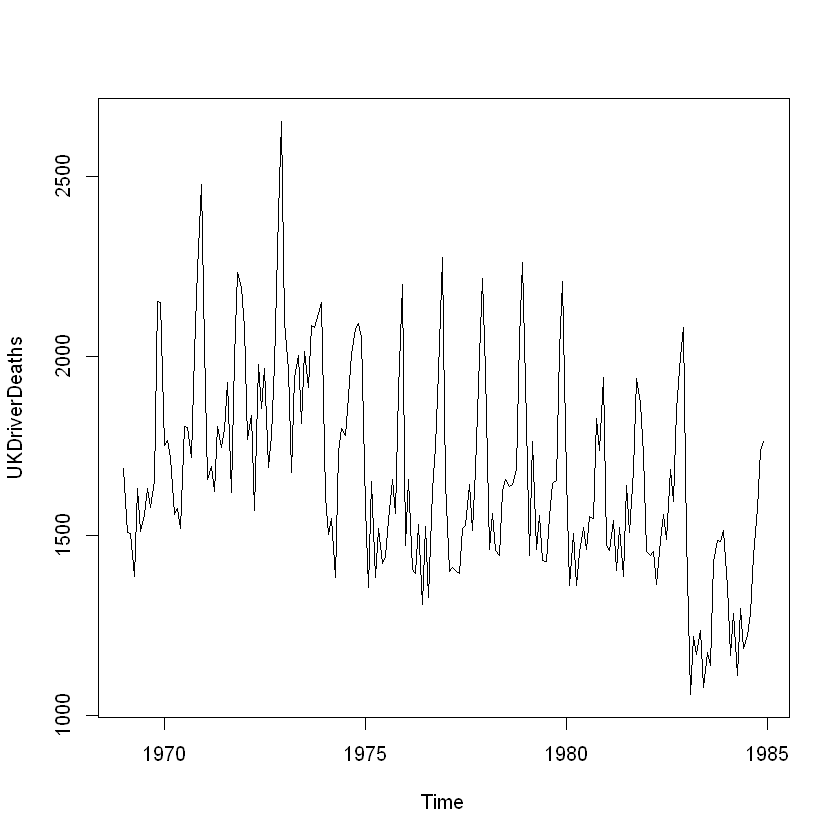

In [3]:
plot(UKDriverDeaths)

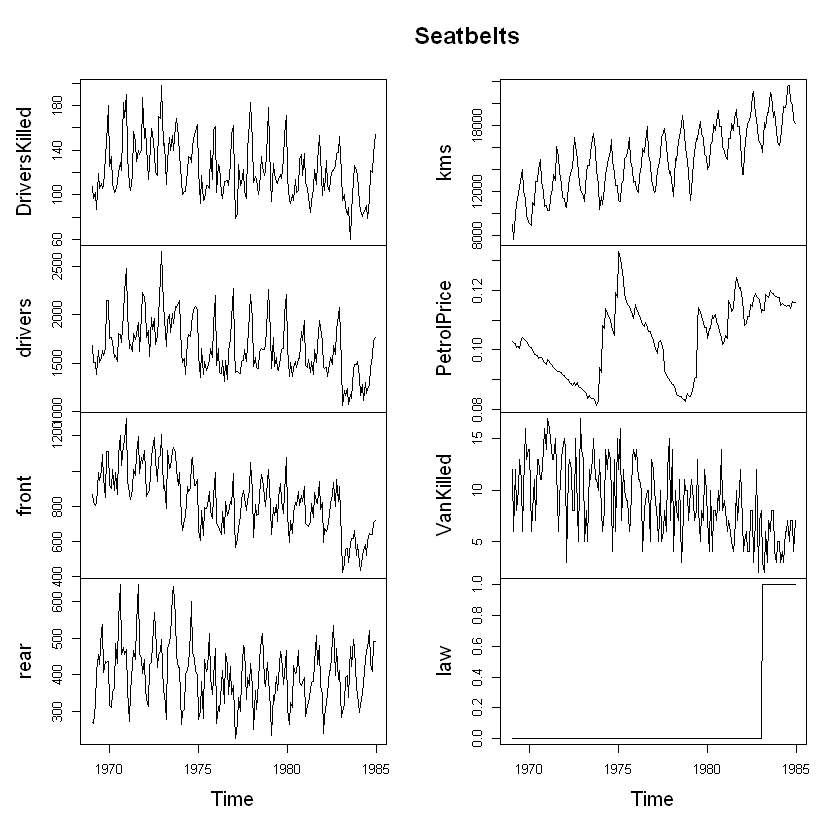

In [4]:
plot(Seatbelts)

In [5]:
Seatbelts=Seatbelts[,-8]
work <- window(UKDriverDeaths, end = 1982+11/12)

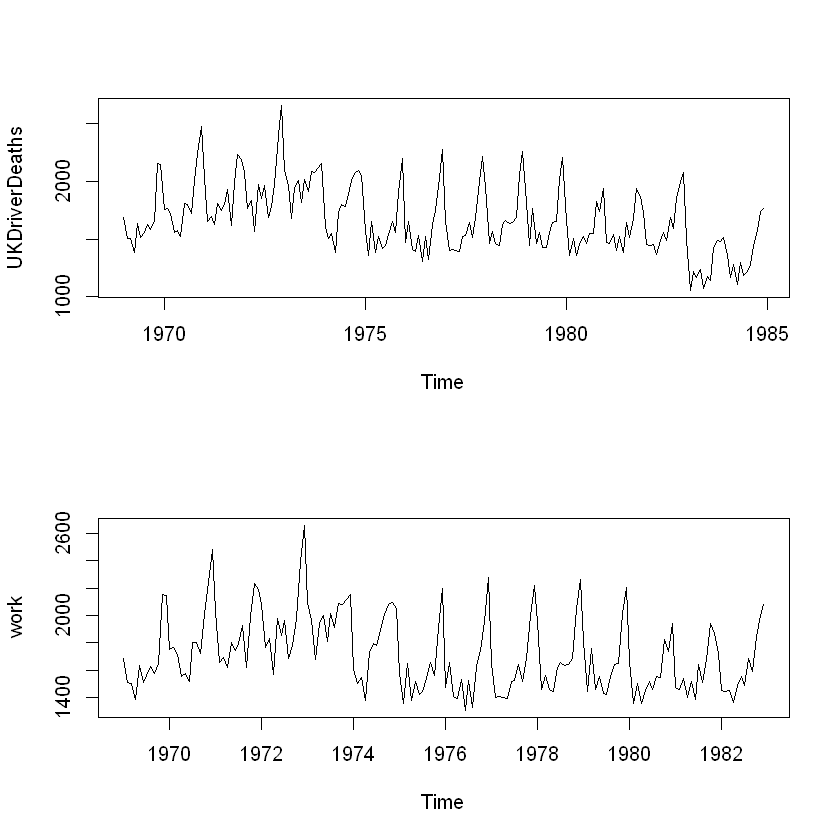

In [6]:
par(mfrow = c(2, 1))
plot(UKDriverDeaths);plot(work)

In [7]:
par(mfrow = c(1, 1))

In [8]:
#纯随机检验函数
#Box.test   Q、LB检验白噪声纯随机性  lag表示阶数 
box_test=function(x,n){
  Q_sta=NULL
  LB_sta=NULL
  Q_pv=NULL
  LB_pv=NULL
  for(i in 1:n){
    test1=Box.test(x,lag=i,type="Box")
    test2=Box.test(x,lag=i,type="Ljung")
    Q_sta[i]=test1$statistic
    Q_pv[i]=test1$p.value
    LB_sta[i]=test2$statistic
    LB_pv[i]=test2$p.value
  }
  result=data.frame(Q_sta,Q_pv,LB_sta,LB_pv)
  return(result)
}

In [9]:
box_test(work,12)

Q_sta,Q_pv,LB_sta,LB_pv
69.34114,1.110223e-16,70.58679,0
90.42387,0.000000e+00,92.17754,0
93.40855,0.000000e+00,95.25266,0
93.41413,0.000000e+00,95.25845,0
93.45068,0.000000e+00,95.29656,0
94.40479,0.000000e+00,96.29780,0
94.76274,0.000000e+00,96.67576,0
95.13118,0.000000e+00,97.06722,0
96.24787,1.110223e-16,98.26116,0
107.64997,0.000000e+00,110.52924,0


In [10]:
pp.test(work)

Warning message in pp.test(work):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  work
Dickey-Fuller Z(alpha) = -62.888, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary


In [11]:
adf.test(work)

Warning message in adf.test(work):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  work
Dickey-Fuller = -6.0473, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


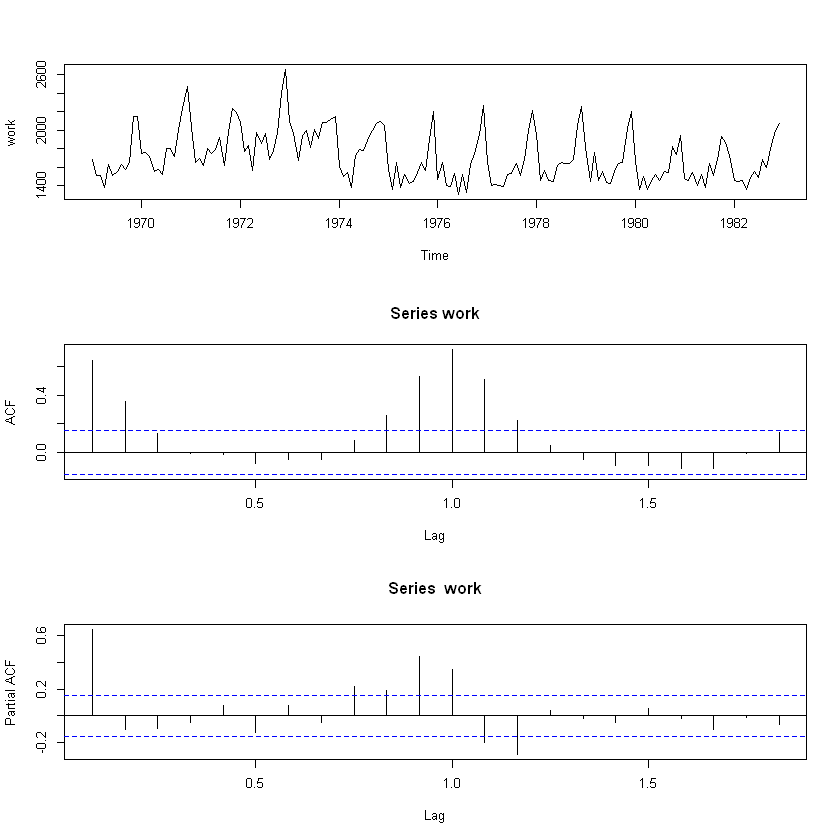

In [14]:
par(mfrow = c(3, 1))
plot(work);acf(work);pacf(work)
#acf从0开始 pacf从1开始

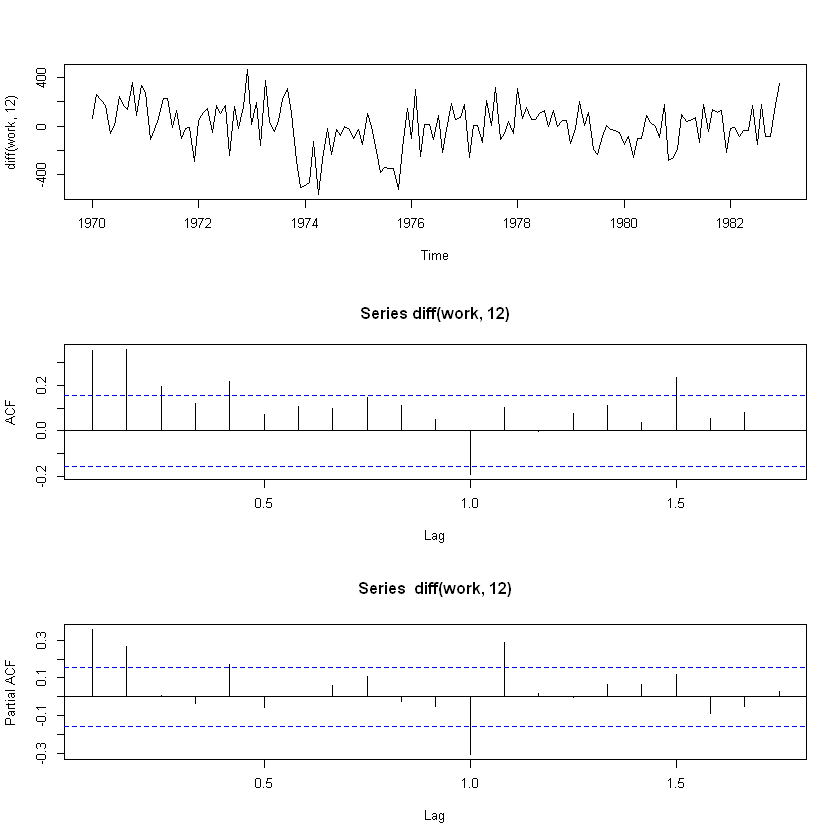

In [15]:
# 12步差分结果
par(mfrow = c(3, 1))
plot(diff(work,12));acf(diff(work,12));pacf(diff(work,12))

In [16]:
par(mfrow = c(1, 1))

In [17]:
model1<-arima(work,order = c(1,0,1),seasonal = list(order=c(0,1,2),period=12))

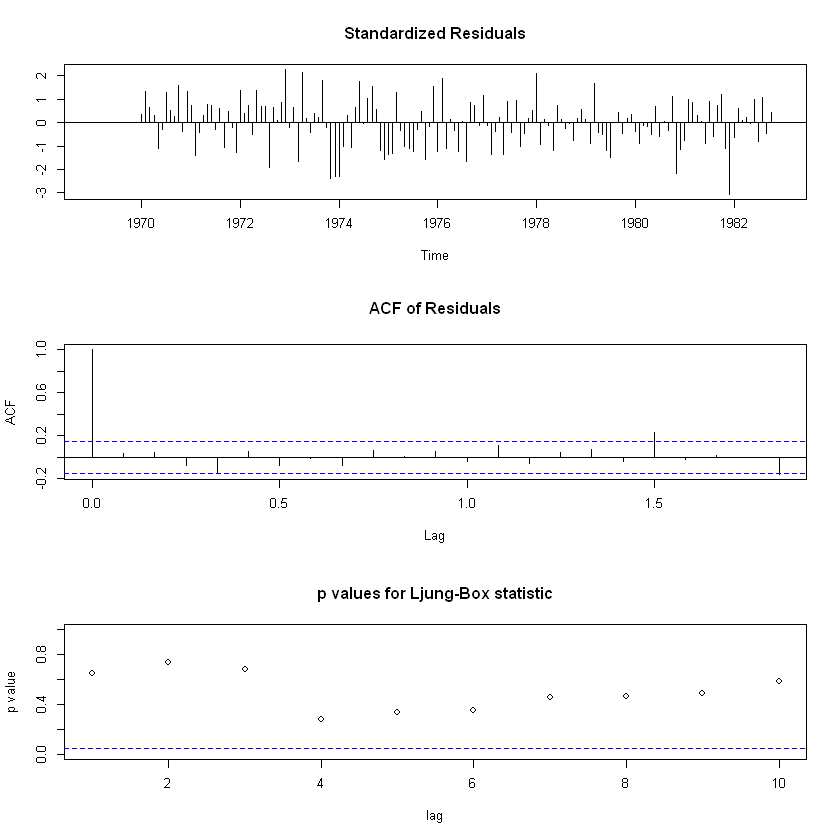

In [18]:
tsdiag(model1)

In [19]:
box_test(model1$residuals,12)

Q_sta,Q_pv,LB_sta,LB_pv
0.207191,0.6489780,0.210913,0.6460528
0.599243,0.7410987,0.612412,0.7362349
1.474581,0.6881494,1.514275,0.6789796
4.941992,0.2933015,5.108543,0.2763406
5.482830,0.3598323,5.672607,0.3393898
6.466547,0.3730029,6.704902,0.3490017
6.481999,0.4847248,6.721219,0.4584721
7.378563,0.4963927,7.673818,0.4659633
8.078699,0.5262352,8.422390,0.4922023
8.093440,0.6197102,8.438252,0.5861103


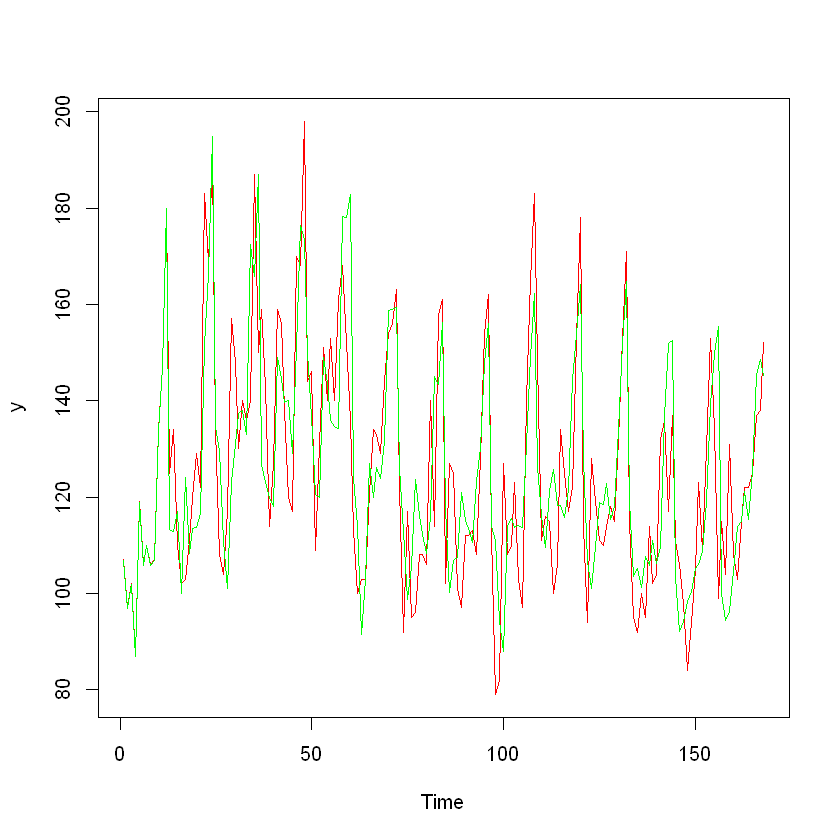

In [22]:
work_mul<-window(Seatbelts, end = 1982+11/12)
y <- work_mul[,1]
y <- as.vector(y)
f.p1<-forecast(y,model=model1,h=12)
#拟合与实际对比图
ts.plot(y,col="red")
lines(f.p1$fitted,col="green")

In [19]:
rmse=(sum(((f.p1$fitted - y)**2))/length(work))^(1/2)
rmse

[1] 15.23014

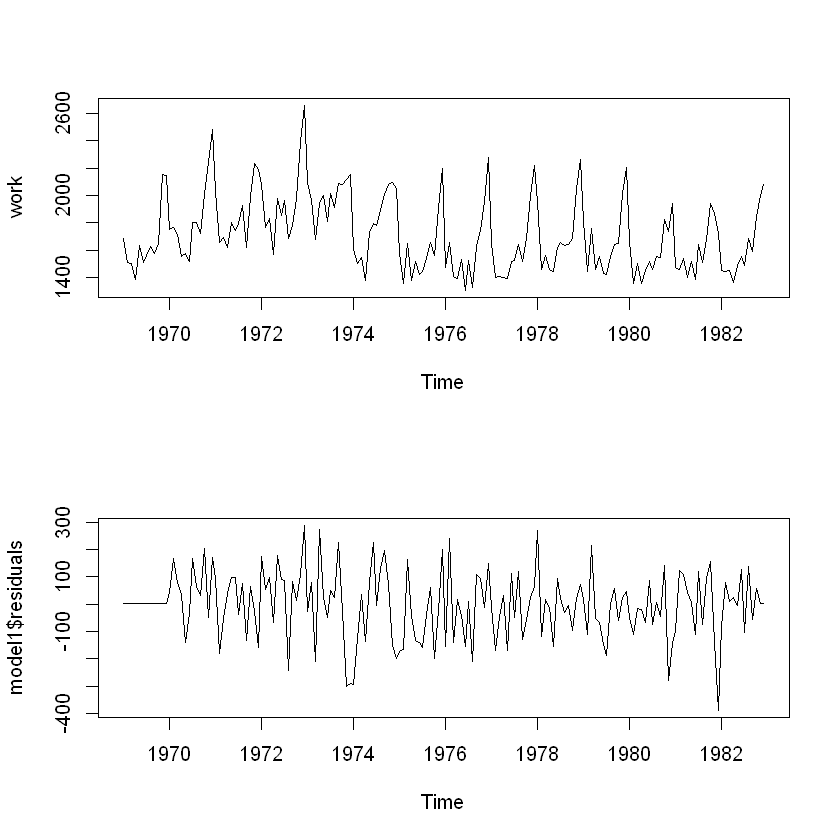

In [20]:
par(mfrow = c(2, 1))
plot(work);plot(model1$residuals)
par(mfrow = c(1, 1))

In [21]:
for (i in 1:5) {print(ArchTest(model1$residuals,lag=i))}


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  model1$residuals
Chi-squared = 2.8815, df = 1, p-value = 0.0896


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  model1$residuals
Chi-squared = 3.0412, df = 2, p-value = 0.2186


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  model1$residuals
Chi-squared = 2.9098, df = 3, p-value = 0.4057


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  model1$residuals
Chi-squared = 4.2981, df = 4, p-value = 0.3672


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  model1$residuals
Chi-squared = 4.3421, df = 5, p-value = 0.5013



In [22]:
ca.jo(Seatbelts[,-8],K=10)


##################################################### 
# Johansen-Procedure Unit Root / Cointegration Test # 
##################################################### 

The value of the test statistic is: 3e-04 3.4677 10.2229 11.5468 18.0972 26.5996 56.9445 


In [23]:
JJ2<-lm(Seatbelts[,1]~Seatbelts[,-1],data=Seatbelts)
summary(JJ2)


Call:
lm(formula = Seatbelts[, 1] ~ Seatbelts[, -1], data = Seatbelts)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.363  -7.729  -0.476   6.770  35.914 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -1.972e+01  1.427e+01  -1.381    0.169    
Seatbelts[, -1]drivers      8.494e-02  5.284e-03  16.075   <2e-16 ***
Seatbelts[, -1]front       -1.472e-02  1.335e-02  -1.103    0.272    
Seatbelts[, -1]rear         1.882e-02  2.063e-02   0.912    0.363    
Seatbelts[, -1]kms          5.109e-04  4.966e-04   1.029    0.305    
Seatbelts[, -1]PetrolPrice -2.368e+01  8.611e+01  -0.275    0.784    
Seatbelts[, -1]VanKilled    2.228e-02  2.887e-01   0.077    0.939    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.58 on 185 degrees of freedom
Multiple R-squared:  0.7982,	Adjusted R-squared:  0.7917 
F-statistic:   122 on 6 and 185 DF,  p-value: < 2.2e-16


In [24]:
pp.test(JJ2$residuals)

Warning message in pp.test(JJ2$residuals):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  JJ2$residuals
Dickey-Fuller Z(alpha) = -177.24, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary


In [25]:
adf.test(JJ2$residuals)

Warning message in adf.test(JJ2$residuals):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  JJ2$residuals
Dickey-Fuller = -6.3349, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary
